# 0. Load libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import researchpy as rp
import seaborn as sns
from matplotlib import pyplot as plt
from utils.func_utils import cross_tabulation_analysis
%matplotlib inline

In [2]:
df_raw = pd.read_csv('data/bank-additional-full.csv', delimiter=";")

In [3]:
df_raw.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
for col in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']:
    df_raw[col] = df_raw[col].astype('category')

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             41188 non-null  int64   
 1   job             41188 non-null  category
 2   marital         41188 non-null  category
 3   education       41188 non-null  category
 4   default         41188 non-null  category
 5   housing         41188 non-null  category
 6   loan            41188 non-null  category
 7   contact         41188 non-null  category
 8   month           41188 non-null  category
 9   day_of_week     41188 non-null  category
 10  duration        41188 non-null  int64   
 11  campaign        41188 non-null  int64   
 12  pdays           41188 non-null  int64   
 13  previous        41188 non-null  int64   
 14  poutcome        41188 non-null  category
 15  emp.var.rate    41188 non-null  float64 
 16  cons.price.idx  41188 non-null  float64 
 17  cons.conf.id

In [6]:
df_raw.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
df_raw.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

# 1a Correlation Heatmap

In [8]:
df_raw.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


Text(0.5, 1.0, 'Triangle Correlation Heatmap')

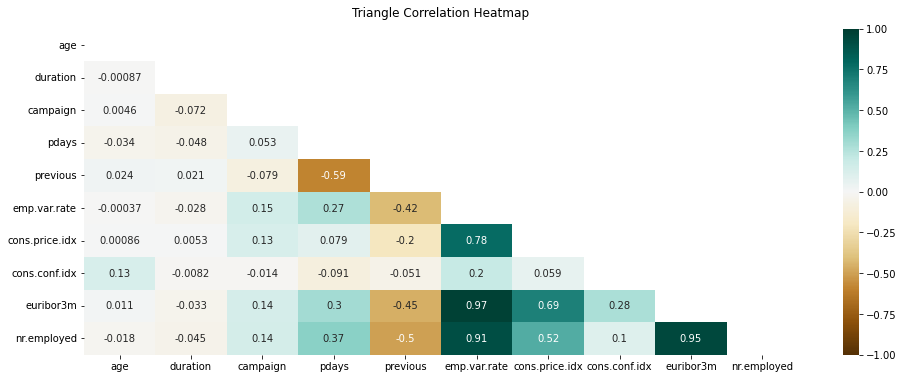

In [9]:
# Plot the heatmap, we only need half of the matrix since it is symmetric. And the correlation of a variable itself is 1.
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df_raw.corr(), dtype=bool))
heatmap = sns.heatmap(df_raw.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

Text(0.5, 1.0, 'Features Correlating with euribor3m')

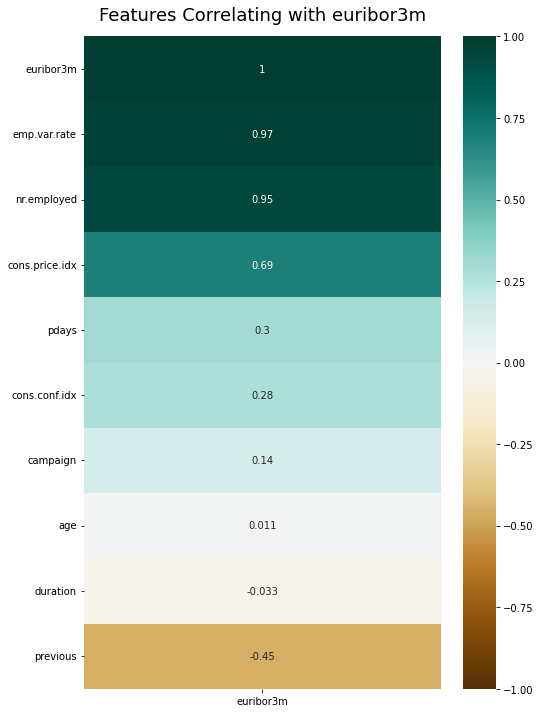

In [10]:
# In case we want to see the sorted correlation for 1 specific variable
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df_raw.corr()[['euribor3m']].sort_values(by='euribor3m', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with euribor3m', fontdict={'fontsize':18}, pad=16)

# 1b Missing(unknown) Value

In [11]:
mask = np.column_stack([df_raw[col].astype(str).str.contains(r"unknown", na=False) for col in df_raw])
df_unknown = df_raw.loc[mask.any(axis=1)]

In [12]:
df_unknown

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
10,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
15,54,retired,married,basic.9y,unknown,yes,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41118,34,technician,married,unknown,no,yes,no,cellular,nov,tue,...,2,999,2,failure,-1.1,94.767,-50.8,1.046,4963.6,no
41120,60,admin.,married,unknown,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.046,4963.6,no
41122,34,technician,married,unknown,no,no,no,cellular,nov,tue,...,3,999,0,nonexistent,-1.1,94.767,-50.8,1.046,4963.6,yes
41135,54,technician,married,unknown,no,yes,no,cellular,nov,thu,...,1,999,1,failure,-1.1,94.767,-50.8,1.041,4963.6,no


## There are 10700 rows with unknown value
## Let's look at which columns have the unknown value and how many are there

In [13]:
for col in df_unknown:
    print(col, df_unknown[col].value_counts()['unknown'] if 'unknown' in df_unknown[col].value_counts() else 0)

age 0
job 330
marital 80
education 1731
default 8597
housing 990
loan 990
contact 0
month 0
day_of_week 0
duration 0
campaign 0
pdays 0
previous 0
poutcome 0
emp.var.rate 0
cons.price.idx 0
cons.conf.idx 0
euribor3m 0
nr.employed 0
y 0


### So, **job, marital, education, default, housing and loan** column has unknown values. All catagoriacal, no numerical.
### Let's do the simplest imputation here first: by replacing the unknown value with the most frequent category in the column

In [14]:
df = df_raw.copy()

In [15]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


0    admin.
Name: job, dtype: category
Categories (12, object): ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', ..., 'student', 'technician', 'unemployed', 'unknown']


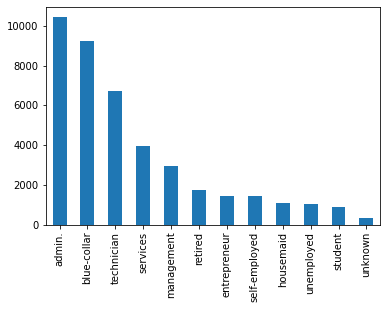

In [16]:
print(df_raw['job'].mode())
df_raw['job'].value_counts().plot.bar()
# in the newly copied dataframe, we replace "unknown" with "admin"
df['job'].replace({"unknown":"admin."}, inplace=True)


0    married
Name: marital, dtype: category
Categories (4, object): ['divorced', 'married', 'single', 'unknown']


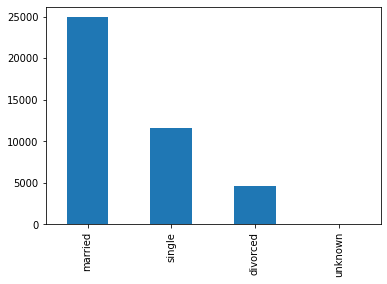

In [17]:
print(df_raw['marital'].mode())
df_raw['marital'].value_counts().plot.bar()
df['marital'].replace({"unknown":"married"}, inplace=True)


0    university.degree
Name: education, dtype: category
Categories (8, object): ['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown']


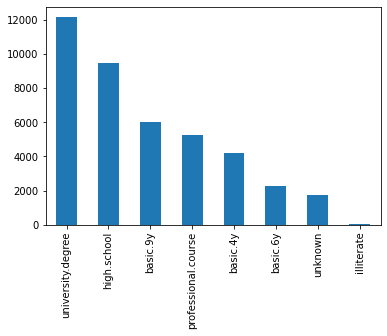

In [18]:
print(df_raw['education'].mode())
df_raw['education'].value_counts().plot.bar()
df['education'].replace({"unknown":"university.degree"}, inplace=True)

0    no
Name: default, dtype: category
Categories (3, object): ['no', 'unknown', 'yes']


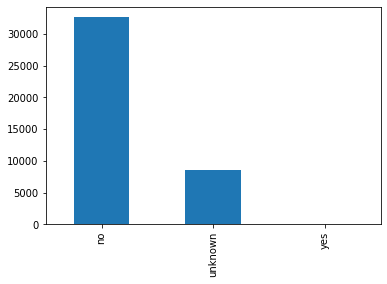

In [19]:
print(df_raw['default'].mode())
df_raw['default'].value_counts().plot.bar()
df['default'].replace({"unknown":"no"}, inplace=True)

0    yes
Name: housing, dtype: category
Categories (3, object): ['no', 'unknown', 'yes']


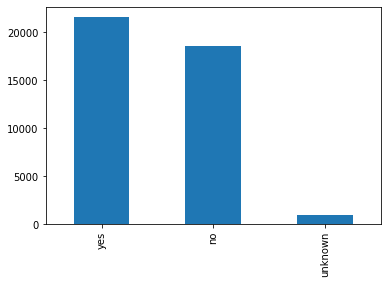

In [20]:
print(df_raw['housing'].mode())
df_raw['housing'].value_counts().plot.bar()
df['housing'].replace({"unknown":"yes"}, inplace=True)

0    no
Name: loan, dtype: category
Categories (3, object): ['no', 'unknown', 'yes']


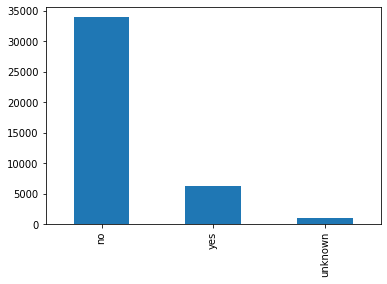

In [21]:
print(df_raw['loan'].mode())
df_raw['loan'].value_counts().plot.bar()
df['loan'].replace({"unknown":"no"}, inplace=True)

## Now, df is the cleaned dataset with all unknown being replaced
## And we can use better methods if time allowed (eg. iterative regression imputation)
http://www.stat.columbia.edu/~gelman/arm/missing.pdf    page 11
## Another way to improve this in my mind is to do clustering first. Then we still impute the missing value with the one with max frequency but within each group.

In [22]:
df.nunique()

age                 78
job                 11
marital              3
education            7
default              2
housing              2
loan                 2
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

# 1c Cross-tabulation analysis

                  y      
y                no   yes
job                      
admin.         9363  1389
blue-collar    8616   638
entrepreneur   1332   124
housemaid       954   106
management     2596   328
retired        1286   434
self-employed  1272   149
services       3646   323
student         600   275
technician     6013   730
unemployed      870   144
                 Chi-square test   results
0  Pearson Chi-square ( 10.0) =   960.2507
1                     p-value =     0.0000
2                  Cramer's V =     0.1527


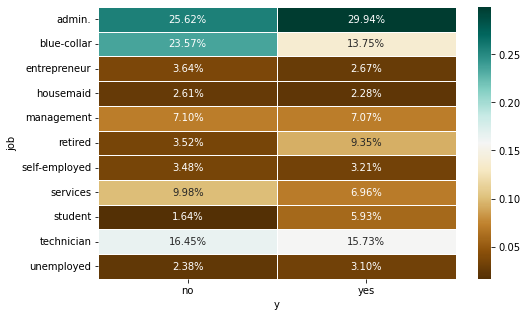

In [23]:
cross_tabulation_analysis(df, "job", "y")

              y      
y            no   yes
marital              
divorced   4136   476
married   22464  2544
single     9948  1620
                Chi-square test   results
0  Pearson Chi-square ( 2.0) =   120.7843
1                    p-value =     0.0000
2                 Cramer's V =     0.0542


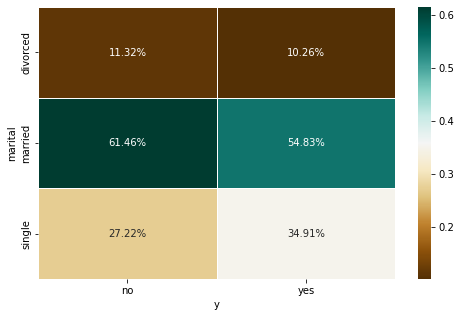

In [24]:
cross_tabulation_analysis(df, "marital", "y")

                         y      
y                       no   yes
education                       
basic.4y              3748   428
basic.6y              2104   188
basic.9y              5572   473
high.school           8484  1031
illiterate              14     4
professional.course   4648   595
university.degree    11978  1921
                Chi-square test   results
0  Pearson Chi-square ( 6.0) =   192.1936
1                    p-value =     0.0000
2                 Cramer's V =     0.0683


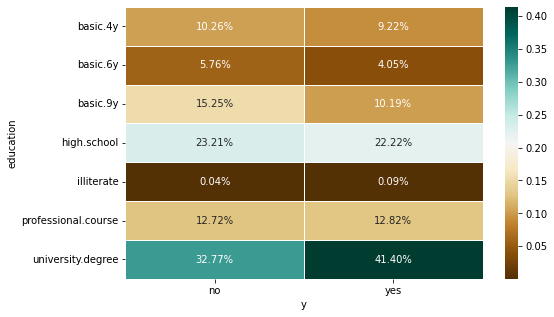

In [25]:
cross_tabulation_analysis(df, "education", "y")

             y      
y           no   yes
default             
no       36545  4640
yes          3     0
                Chi-square test  results
0  Pearson Chi-square ( 1.0) =    0.3809
1                    p-value =    0.5371
2               Cramer's phi =    0.0030


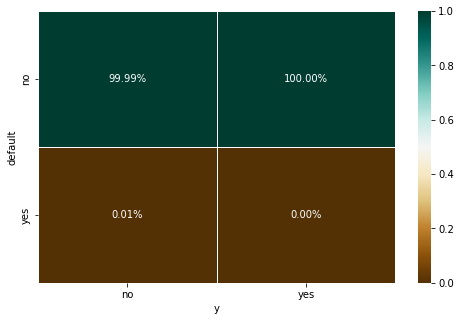

In [26]:
cross_tabulation_analysis(df, "default", "y")

             y      
y           no   yes
housing             
no       16596  2026
yes      19952  2614
                Chi-square test  results
0  Pearson Chi-square ( 1.0) =    5.0612
1                    p-value =    0.0245
2               Cramer's phi =    0.0111


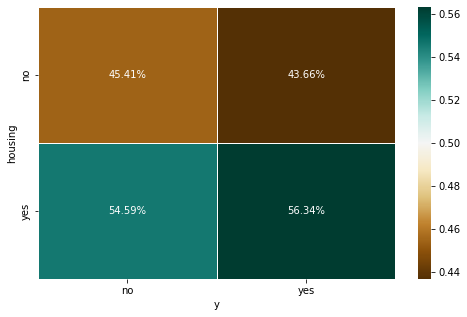

In [27]:
cross_tabulation_analysis(df, "housing", "y")

          y      
y        no   yes
loan             
no    30983  3957
yes    5565   683
                Chi-square test  results
0  Pearson Chi-square ( 1.0) =    0.8215
1                    p-value =    0.3647
2               Cramer's phi =    0.0045


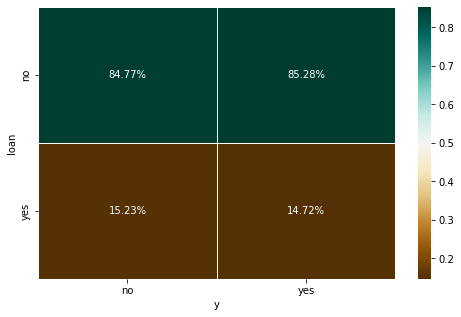

In [28]:
cross_tabulation_analysis(df, "loan", "y")

               y      
y             no   yes
contact               
cellular   22291  3853
telephone  14257   787
                Chi-square test   results
0  Pearson Chi-square ( 1.0) =   863.2691
1                    p-value =     0.0000
2               Cramer's phi =     0.1448


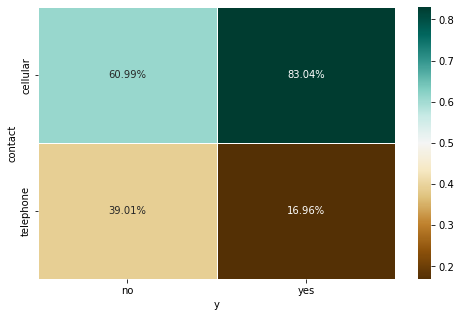

In [29]:
cross_tabulation_analysis(df, "contact", "y")

           y     
y         no  yes
month            
apr     2093  539
aug     5523  655
dec       93   89
jul     6525  649
jun     4759  559
mar      270  276
may    12883  886
nov     3685  416
oct      403  315
sep      314  256
                Chi-square test    results
0  Pearson Chi-square ( 9.0) =   3101.1494
1                    p-value =      0.0000
2                 Cramer's V =      0.2744


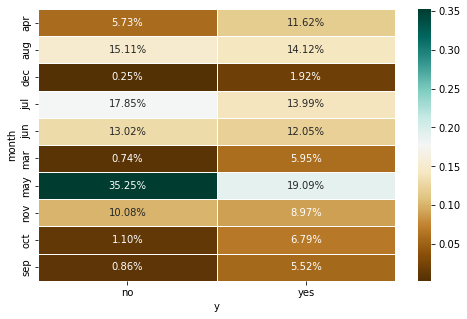

In [30]:
cross_tabulation_analysis(df, "month", "y")

                y      
y              no   yes
day_of_week            
fri          6981   846
mon          7667   847
thu          7578  1045
tue          7137   953
wed          7185   949
                Chi-square test  results
0  Pearson Chi-square ( 4.0) =   26.1449
1                    p-value =    0.0000
2                 Cramer's V =    0.0252


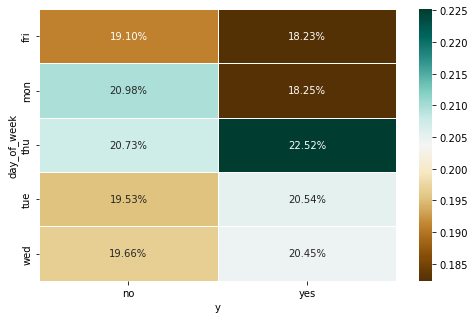

In [31]:
cross_tabulation_analysis(df, "day_of_week", "y")

                 y      
y               no   yes
poutcome                
failure       3647   605
nonexistent  32422  3141
success        479   894
                Chi-square test    results
0  Pearson Chi-square ( 2.0) =   4230.5238
1                    p-value =      0.0000
2                 Cramer's V =      0.3205


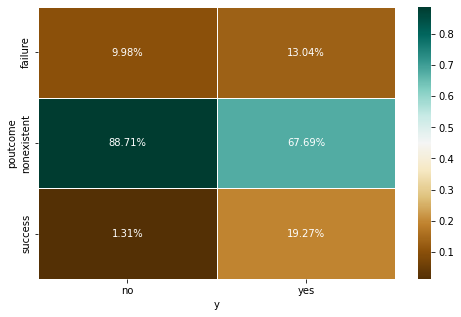

In [32]:
cross_tabulation_analysis(df, "poutcome", "y")

## Job, Marital, Education, Housing, Contact, month, day-of-week and poutcome seem to influence the target variable with p < 0.05

# 1d EDA Summary
#### Group1 seem to be the most useful variables by now. But we only looked into categorical datas and haven't do any analysis on the numeric datas so far. 
#### TODO: Was the campaign successful? I am not sure how to do this... Maybe compare the ratio of outcomes in this campaign vs. the previous one? Then it is an unsuccessful one (See below, 11.3% vs. 24.4%).

In [33]:
df["y"].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [34]:
df["poutcome"].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [35]:
print(4640 / (4640 + 36548), 1373 / (1373 + 4252))

0.11265417111780131 0.24408888888888888


In [48]:
df.to_csv("./data/cleaned_data.csv", sep=",", index=False)

# 2 Improved unknown value handling
#### Clustering fisrt, then assign the most frequent value

## 2.1 Data processing and standalization

In [49]:
df_raw.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [50]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [55]:
# drop out all catagorical 
df_new = df_raw.drop(['duration', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y'], axis=1)

In [56]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   campaign        41188 non-null  int64  
 2   pdays           41188 non-null  int64  
 3   previous        41188 non-null  int64  
 4   emp.var.rate    41188 non-null  float64
 5   cons.price.idx  41188 non-null  float64
 6   cons.conf.idx   41188 non-null  float64
 7   euribor3m       41188 non-null  float64
 8   nr.employed     41188 non-null  float64
dtypes: float64(5), int64(4)
memory usage: 2.8 MB


In [57]:
df_new.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [62]:
# The data is not on the same scale, standarlize first
scalar = StandardScaler()
scaled_data = scalar.fit_transform(df_new)
scaled_data[0]


array([ 1.53303429, -0.56592197,  0.1954139 , -0.34949428,  0.64809227,
        0.72272247,  0.88644656,  0.71245988,  0.33167991])

## 2.2 Apply PCA to do dimension reduction

In [63]:
pca = PCA()
pca.fit(scaled_data)

PCA()

In [64]:
pca.explained_variance_ratio_

array([0.43262262, 0.15072846, 0.11973066, 0.10840813, 0.09429445,
       0.0473256 , 0.04294602, 0.00276561, 0.00117844])

Text(0.5, 0, 'Cumulative Explained Variance')

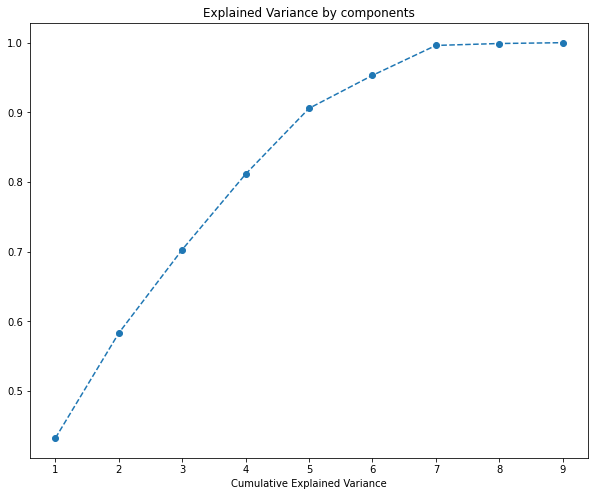

In [67]:
# how many features need to keep
plt.figure(figsize = (10, 8))
plt.plot(range(1, 10), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title("Explained Variance by components")
plt.xlabel("Number of components")
plt.xlabel("Cumulative Explained Variance")

## So we keep 4 components to preserve 80% of the variance

In [68]:
pca = PCA(n_components=4)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

In [70]:
pca_data[0]

array([-1.26917737,  0.88451017, -1.48679009, -0.03685898])

## 2.3 K-means clustering
#### Use elbow methods to decide the number of clusters

In [73]:
from tqdm import tqdm
wcss = []
for i in tqdm(range(1, 15)):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans_pca.fit(pca_data)
    wcss.append(kmeans_pca.inertia_)

100%|██████████| 14/14 [00:03<00:00,  4.00it/s]


Text(0.5, 0, 'WCSS')

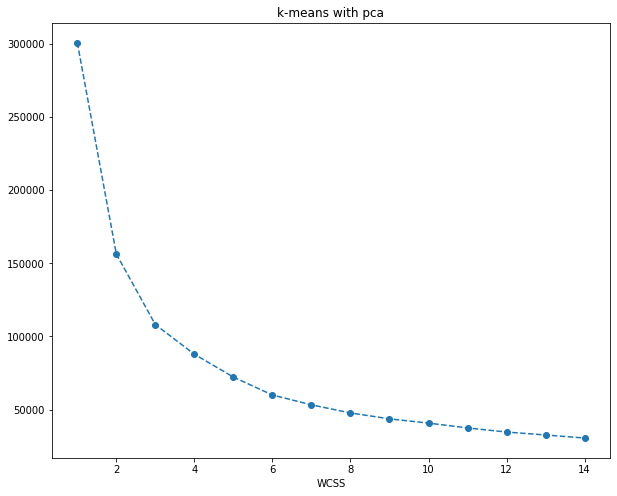

In [74]:
# kmeans elbow methods
plt.figure(figsize = (10, 8))
plt.plot(range(1, 15), wcss, marker='o', linestyle='--')
plt.title("k-means with pca")
plt.xlabel("Number of Clusters")
plt.xlabel("WCSS")

## The kink comes at 3 clusters

In [77]:
# Let's finally implement it
kmeans_pca = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans_pca.fit(pca_data)

KMeans(n_clusters=3, random_state=42)

In [78]:
# concat the result back to the raw df
df_pca_kmeans = pd.concat([df_raw.reset_index(drop=True), pd.DataFrame(pca_data)], axis=1)
df_pca_kmeans.columns.values[-4:] = ["Component1", "Component2", "Component3", "Component4"]
df_pca_kmeans["k-means cluster"] = kmeans_pca.labels_

In [80]:
df_pca_kmeans.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,Component1,Component2,Component3,Component4,k-means cluster
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,94.767,-50.8,1.028,4963.6,yes,1.806778,-0.175653,-0.801034,1.279806,0
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,94.767,-50.8,1.028,4963.6,no,1.802679,-0.837159,0.868967,0.160889,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,94.767,-50.8,1.028,4963.6,no,1.768109,-0.590343,0.359141,0.896088,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,94.767,-50.8,1.028,4963.6,yes,1.802375,-0.886160,0.992671,0.078006,0
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,94.767,-50.8,1.028,4963.6,no,2.352837,0.817836,-0.080128,1.914668,0


/Users/Lin/opt/anaconda3/envs/2022datathon/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


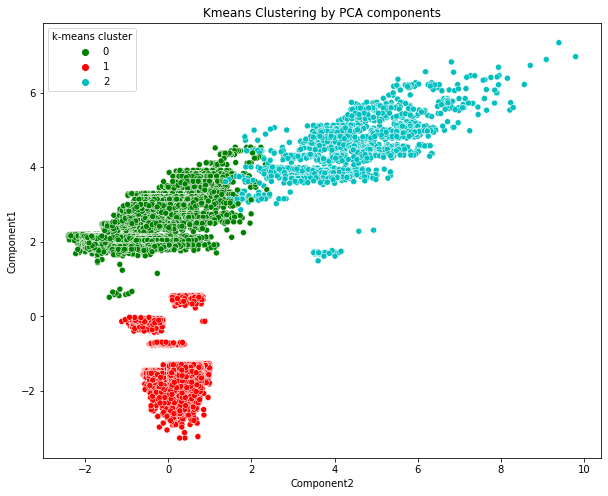

In [82]:
x_axis = df_pca_kmeans["Component2"]
y_axis = df_pca_kmeans["Component1"]
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue=df_pca_kmeans["k-means cluster"], palette=["g", "r", "c"])
plt.title("Kmeans Clustering by PCA components")
plt.show()
